# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_keys)

8f8c2ca991ce37ac4429b95eee251abe


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
cities_df=pd.DataFrame({"City": cities})
cities_df=cities_df.drop_duplicates("City")
cities_df.head()

,City
0,port alfred
1,lebu
2,visby
3,ushuaia
4,sur


In [4]:
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind_Speed"] = ""
cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,port alfred,,,,,,
1,lebu,,,,,,
2,visby,,,,,,
3,ushuaia,,,,,,
4,sur,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
counter=0
for index, row in cities_df.iterrows():
    city = row ["City"]
    weather_url = url + "&q=" + city + "&appid=" + api_keys + "&units=" + units
    response = requests.get(weather_url).json()
    
    if response["cod"] == "404":
        print("City not found, skipping...")

    else:
        cities_df.set_value(index, "City", response["name"])
        cities_df.set_value(index, "Temperature", response["main"]["temp"])
        cities_df.set_value(index, "Latitude", response["coord"]["lat"])
        cities_df.set_value(index, "Longitude", response["coord"]["lon"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_df.set_value(index, "Wind_Speed", response["wind"]["speed"])

        print(f"Processing Record city number: "+ str(counter+1) +" "+ "City Name:" + city)
        print(response)
        print(weather_url)
        counter +=1

C:\Users\aparn\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\aparn\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\aparn\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\aparn\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\aparn\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_l

Processing Record city number: 1 City Name:Port Alfred
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.24, 'pressure': 1026.72, 'humidity': 92, 'temp_min': 68.24, 'temp_max': 68.24, 'sea_level': 1035.58, 'grnd_level': 1026.72}, 'wind': {'speed': 12.66, 'deg': 89.502}, 'clouds': {'all': 76}, 'dt': 1538850458, 'sys': {'message': 0.0034, 'country': 'ZA', 'sunrise': 1538797326, 'sunset': 1538842750}, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=Port Alfred&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 2 City Name:lebu
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 55.1, 'pressure': 777.86, 'humidity': 44, 'temp_min': 55.1, 'temp_max': 55.1, 'sea_level': 1022.61, 

Processing Record city number: 14 City Name:nuuk
{'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 982, 'humidity': 64, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 33.002}, 'clouds': {'all': 75}, 'dt': 1538848200, 'sys': {'type': 1, 'id': 4801, 'message': 0.0042, 'country': 'GL', 'sunrise': 1538819561, 'sunset': 1538858131}, 'id': 3421319, 'name': 'Nuuk', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=nuuk&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 15 City Name:los llanos de aridane
{'coord': {'lon': -17.92, 'lat': 28.66}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1015, 'humidity': 73, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': 

Processing Record city number: 26 City Name:kaset sombun
{'coord': {'lon': 101.95, 'lat': 16.28}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.77, 'pressure': 981.64, 'humidity': 85, 'temp_min': 69.77, 'temp_max': 69.77, 'sea_level': 1025.57, 'grnd_level': 981.64}, 'wind': {'speed': 2.37, 'deg': 35.002}, 'clouds': {'all': 36}, 'dt': 1538850509, 'sys': {'message': 0.0029, 'country': 'TH', 'sunrise': 1538780578, 'sunset': 1538823431}, 'id': 1610187, 'name': 'Kaset Sombun', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=kaset sombun&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 27 City Name:new norfolk
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1026, 'humidity': 87, 'temp_min': 50, 'temp_max': 50}, 'visibil

Processing Record city number: 38 City Name:jalu
{'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86.33, 'pressure': 1022.66, 'humidity': 28, 'temp_min': 86.33, 'temp_max': 86.33, 'sea_level': 1029.83, 'grnd_level': 1022.66}, 'wind': {'speed': 6.62, 'deg': 4.00195}, 'clouds': {'all': 56}, 'dt': 1538850513, 'sys': {'message': 0.003, 'country': 'LY', 'sunrise': 1538800197, 'sunset': 1538842385}, 'id': 86049, 'name': 'Jalu', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=jalu&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 39 City Name:bredasdorp
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1022, 'humidity': 82, 'temp_min': 66.2, 'temp_max': 66.2}, 'wind': {'speed': 10.29, 'deg'

Processing Record city number: 51 City Name:clyde river
{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 987, 'humidity': 92, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 2012, 'wind': {'speed': 29.97, 'deg': 310, 'gust': 18.5}, 'clouds': {'all': 90}, 'dt': 1538848500, 'sys': {'type': 1, 'id': 3585, 'message': 0.0048, 'country': 'CA', 'sunrise': 1538824487, 'sunset': 1538861263}, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=clyde river&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 52 City Name:sosnovka
{'coord': {'lon': 41.37, 'lat': 53.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.12, 'pressure': 1015.53, 'humidity': 85, 'temp_min': 53.12, 'temp_max': 53.12, 'sea_lev

Processing Record city number: 64 City Name:tame
{'coord': {'lon': -71.72, 'lat': 6.46}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 62.3, 'pressure': 829.66, 'humidity': 100, 'temp_min': 62.3, 'temp_max': 62.3, 'sea_level': 1023.79, 'grnd_level': 829.66}, 'wind': {'speed': 1.59, 'deg': 94.002}, 'rain': {'3h': 4.86}, 'clouds': {'all': 88}, 'dt': 1538850520, 'sys': {'message': 0.0032, 'country': 'CO', 'sunrise': 1538822035, 'sunset': 1538865327}, 'id': 3667478, 'name': 'Tame', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=tame&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 65 City Name:grindavik
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 987, 'humidity': 80, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 1000

Processing Record city number: 76 City Name:fortuna
{'coord': {'lon': -1.13, 'lat': 38.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.98, 'pressure': 1014, 'humidity': 53, 'temp_min': 73.4, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1538848800, 'sys': {'type': 1, 'id': 5494, 'message': 0.0063, 'country': 'ES', 'sunrise': 1538805918, 'sunset': 1538847538}, 'id': 2517679, 'name': 'Fortuna', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=fortuna&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 77 City Name:castro
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.13, 'pressure': 1011.23, 'humidity': 76, 'temp_min': 52.13, 'temp_max': 52.13, 'sea_level': 1026.1, 'grnd_level': 

Processing Record city number: 89 City Name:camacha
{'coord': {'lon': -16.33, 'lat': 33.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1016, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1538848800, 'sys': {'type': 1, 'id': 5960, 'message': 0.003, 'country': 'PT', 'sunrise': 1538809407, 'sunset': 1538851349}, 'id': 2270385, 'name': 'Camacha', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=camacha&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 90 City Name:delaware
{'coord': {'lon': -83.07, 'lat': 40.3}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.44, 'pressure': 1018, 'humidity': 51, 'temp_min': 77, 'temp_max': 86.9}, 'visibility': 16093, 'wind': {'speed': 1

Processing Record city number: 103 City Name:san juan
{'coord': {'lon': 121.03, 'lat': 14.6}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1011, 'humidity': 100, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 60.002}, 'clouds': {'all': 40}, 'dt': 1538848800, 'sys': {'type': 1, 'id': 7706, 'message': 0.0042, 'country': 'PH', 'sunrise': 1538775960, 'sunset': 1538818894}, 'id': 1692193, 'name': 'San Juan', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=san juan&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 104 City Name:nome
{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 86.65, 'pressure': 1015, 'humidity': 65, 'temp_min': 83.3, 'temp_max': 88.52}, 'visibility': 16093, 'wind': {'spe

Processing Record city number: 115 City Name:kaka
{'coord': {'lon': 59.62, 'lat': 37.35}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.3, 'pressure': 920.85, 'humidity': 100, 'temp_min': 44.3, 'temp_max': 44.3, 'sea_level': 1044.9, 'grnd_level': 920.85}, 'wind': {'speed': 3.94, 'deg': 339.502}, 'rain': {'3h': 6.4525}, 'clouds': {'all': 92}, 'dt': 1538850534, 'sys': {'message': 0.0037, 'country': 'TM', 'sunrise': 1538791301, 'sunset': 1538833001}, 'id': 161901, 'name': 'Kaka', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=kaka&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 116 City Name:ugoofaaru
{'coord': {'lon': 73, 'lat': 5.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.76, 'pressure': 1022.66, 'humidity': 100, 'temp_min': 79.76, 'temp_max': 79.76, 'sea_level': 102

Processing Record city number: 128 City Name:luoyang
{'coord': {'lon': 112.42, 'lat': 34.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.49, 'pressure': 989.99, 'humidity': 56, 'temp_min': 61.49, 'temp_max': 61.49, 'sea_level': 1033.96, 'grnd_level': 989.99}, 'wind': {'speed': 6.17, 'deg': 59.502}, 'clouds': {'all': 0}, 'dt': 1538850538, 'sys': {'message': 0.0086, 'country': 'CN', 'sunrise': 1538778539, 'sunset': 1538820428}, 'id': 1801792, 'name': 'Luoyang', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=luoyang&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 129 City Name:koutiala
{'coord': {'lon': -5.46, 'lat': 12.39}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 85.43, 'pressure': 987.97, 'humidity': 66, 'temp_min': 85.43, 'temp_max': 85.43, 'sea_level': 1023.67, 

Processing Record city number: 142 City Name:san vicente de canete
{'coord': {'lon': -76.38, 'lat': -13.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 67.79, 'pressure': 933.25, 'humidity': 74, 'temp_min': 67.79, 'temp_max': 67.79, 'sea_level': 1025.9, 'grnd_level': 933.25}, 'wind': {'speed': 4.61, 'deg': 257.002}, 'clouds': {'all': 12}, 'dt': 1538850543, 'sys': {'message': 0.0046, 'country': 'PE', 'sunrise': 1538822693, 'sunset': 1538866921}, 'id': 3928993, 'name': 'San Vicente de Canete', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=san vicente de canete&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 143 City Name:ahuimanu
{'coord': {'lon': -157.84, 'lat': 21.44}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 76.89, 'pressure': 1013, 'humidity': 90, 'temp_min': 72.5, 'te

Processing Record city number: 154 City Name:san patricio
{'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.55, 'pressure': 1016.75, 'humidity': 65, 'temp_min': 73.55, 'temp_max': 73.55, 'sea_level': 1026.79, 'grnd_level': 1016.75}, 'wind': {'speed': 2.37, 'deg': 116.002}, 'clouds': {'all': 80}, 'dt': 1538850546, 'sys': {'message': 0.0046, 'country': 'PY', 'sunrise': 1538817620, 'sunset': 1538862626}, 'id': 3437029, 'name': 'San Patricio', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=san patricio&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 155 City Name:severo-kurilsk
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 46.19, 'pressure': 1010.58, 'humidity': 92, 'temp_min': 46.19, 'temp_ma

Processing Record city number: 166 City Name:gimli
{'coord': {'lon': -96.99, 'lat': 50.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 38.18, 'pressure': 1007.58, 'humidity': 100, 'temp_min': 38.18, 'temp_max': 38.18, 'sea_level': 1038.14, 'grnd_level': 1007.58}, 'wind': {'speed': 5.28, 'deg': 257.002}, 'clouds': {'all': 0}, 'dt': 1538850440, 'sys': {'message': 0.0036, 'country': 'CA', 'sunrise': 1538829453, 'sunset': 1538869988}, 'id': 5961417, 'name': 'Gimli', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=gimli&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 167 City Name:airai
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.42, 'pressure': 947.84, 'humidity': 73, 'temp_min': 59.42, 'temp_max': 59.42, 'sea_level': 1024.48, 'grnd_level'

Processing Record city number: 178 City Name:hithadhoo
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.2, 'pressure': 1022.66, 'humidity': 100, 'temp_min': 81.2, 'temp_max': 81.2, 'sea_level': 1022.65, 'grnd_level': 1022.66}, 'wind': {'speed': 20.27, 'deg': 265.002}, 'rain': {'3h': 1.5525}, 'clouds': {'all': 68}, 'dt': 1538850552, 'sys': {'message': 0.0027, 'country': 'MV', 'sunrise': 1538787129, 'sunset': 1538830749}, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=hithadhoo&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 179 City Name:nguruka
{'coord': {'lon': 31.04, 'lat': -5.11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.59, 'pressure': 897.42, 'humidity': 42, 'temp_min': 78.59, 'temp_max':

Processing Record city number: 190 City Name:groningen
{'coord': {'lon': 6.57, 'lat': 53.22}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 55.42, 'pressure': 1007, 'humidity': 93, 'temp_min': 51.8, 'temp_max': 59}, 'visibility': 4700, 'wind': {'speed': 6.93, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1538848860, 'sys': {'type': 1, 'id': 5209, 'message': 0.0051, 'country': 'NL', 'sunrise': 1538804708, 'sunset': 1538845030}, 'id': 2755251, 'name': 'Groningen', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=groningen&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 191 City Name:naze
{'coord': {'lon': 7.07, 'lat': 5.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1011, 'humidity': 88, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 6.17

Processing Record city number: 203 City Name:magaria
{'coord': {'lon': 8.91, 'lat': 13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 88.67, 'pressure': 977.35, 'humidity': 58, 'temp_min': 88.67, 'temp_max': 88.67, 'sea_level': 1021.92, 'grnd_level': 977.35}, 'wind': {'speed': 2.37, 'deg': 75.502}, 'clouds': {'all': 20}, 'dt': 1538850558, 'sys': {'message': 0.003, 'country': 'NE', 'sunrise': 1538802834, 'sunset': 1538845828}, 'id': 2441482, 'name': 'Magaria', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=magaria&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 204 City Name:perevoz
{'coord': {'lon': 44.54, 'lat': 55.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 50.42, 'pressure': 1008.47, 'humidity': 95, 'temp_min': 50.42, 'temp_max': 50.42, 'sea_level': 1027.52, 'grnd_level'

Processing Record city number: 215 City Name:izmaylovo
{'coord': {'lon': 47.24, 'lat': 53.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.64, 'pressure': 1005.31, 'humidity': 89, 'temp_min': 46.64, 'temp_max': 46.64, 'sea_level': 1032.62, 'grnd_level': 1005.31}, 'wind': {'speed': 11.32, 'deg': 252.002}, 'rain': {'3h': 0.18}, 'clouds': {'all': 92}, 'dt': 1538850562, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1538794963, 'sunset': 1538835256}, 'id': 554791, 'name': 'Izmaylovo', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=izmaylovo&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 216 City Name:thompson
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1018, 'humidity': 93, 'temp_min': 35.6, 'temp_max': 35.6

Processing Record city number: 228 City Name:pacific grove
{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.35, 'pressure': 1015, 'humidity': 72, 'temp_min': 64.04, 'temp_max': 66.92}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1538848500, 'sys': {'type': 1, 'id': 431, 'message': 0.0041, 'country': 'US', 'sunrise': 1538834874, 'sunset': 1538876552}, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=pacific grove&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 229 City Name:dingle
{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.99, 'pressure': 1003.53, 'humidity': 96, 'temp_min': 74.99, 'temp_max': 74.99, 'sea_level'

Processing Record city number: 240 City Name:karpogory
{'coord': {'lon': 44.44, 'lat': 64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.53, 'pressure': 1002.39, 'humidity': 93, 'temp_min': 39.53, 'temp_max': 39.53, 'sea_level': 1011.51, 'grnd_level': 1002.39}, 'wind': {'speed': 6.62, 'deg': 214.502}, 'clouds': {'all': 76}, 'dt': 1538850569, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1538796413, 'sunset': 1538835122}, 'id': 552256, 'name': 'Karpogory', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=karpogory&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 241 City Name:srednekolymsk
{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.44, 'pressure': 1026.72, 'humidity': 89, 'temp_min': 30.44, 'temp_max': 30.44, 'sea_le

Processing Record city number: 252 City Name:kuvandyk
{'coord': {'lon': 57.35, 'lat': 51.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 36.2, 'pressure': 988.37, 'humidity': 85, 'temp_min': 36.2, 'temp_max': 36.2, 'sea_level': 1036.03, 'grnd_level': 988.37}, 'wind': {'speed': 10.98, 'deg': 278.502}, 'clouds': {'all': 48}, 'dt': 1538850572, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1538792413, 'sunset': 1538832958}, 'id': 538138, 'name': 'Kuvandyk', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=kuvandyk&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 253 City Name:tezu
{'coord': {'lon': 96.16, 'lat': 27.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 62.03, 'pressure': 882.59, 'humidity': 74, 'temp_min': 62.03, 'temp_max': 62.03, 'sea_level': 1026

Processing Record city number: 265 City Name:tondano
{'coord': {'lon': 124.91, 'lat': 1.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1010, 'humidity': 94, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 9000, 'wind': {'speed': 2.24, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1538848800, 'sys': {'type': 1, 'id': 8012, 'message': 0.0031, 'country': 'ID', 'sunrise': 1538774734, 'sunset': 1538818268}, 'id': 1623424, 'name': 'Tondano', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=tondano&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 266 City Name:port hardy
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1022, 'humidity': 81, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 32186, 'wind': {'spee

Processing Record city number: 279 City Name:bonavista
{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.14, 'pressure': 1028.58, 'humidity': 87, 'temp_min': 51.14, 'temp_max': 51.14, 'sea_level': 1030.8, 'grnd_level': 1028.58}, 'wind': {'speed': 11.65, 'deg': 315.502}, 'clouds': {'all': 0}, 'dt': 1538850579, 'sys': {'message': 0.0033, 'country': 'CA', 'sunrise': 1538818814, 'sunset': 1538859572}, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=bonavista&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 280 City Name:ouesso
{'coord': {'lon': 16.05, 'lat': 1.61}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.23, 'pressure': 984.4, 'humidity': 100, 'temp_min': 69.23, 'temp_max': 69.23, 'sea_level': 1

Processing Record city number: 292 City Name:scottsbluff
{'coord': {'lon': -103.67, 'lat': 41.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.43, 'pressure': 1019, 'humidity': 65, 'temp_min': 48.02, 'temp_max': 48.92}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1538848380, 'sys': {'type': 1, 'id': 1925, 'message': 0.0037, 'country': 'US', 'sunrise': 1538830675, 'sunset': 1538871985}, 'id': 5699404, 'name': 'Scottsbluff', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=scottsbluff&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 293 City Name:banda aceh
{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.73, 'pressure': 998.18, 'humidity': 100, 'temp_min': 73.73, 'temp_max': 73.73, 'sea_level':

Processing Record city number: 304 City Name:sena madureira
{'coord': {'lon': -68.66, 'lat': -9.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 89.12, 'pressure': 1003.69, 'humidity': 66, 'temp_min': 89.12, 'temp_max': 89.12, 'sea_level': 1022.73, 'grnd_level': 1003.69}, 'wind': {'speed': 2.59, 'deg': 142.002}, 'rain': {'3h': 0.84}, 'clouds': {'all': 32}, 'dt': 1538850586, 'sys': {'message': 0.0033, 'country': 'BR', 'sunrise': 1538820940, 'sunset': 1538864966}, 'id': 3662155, 'name': 'Sena Madureira', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=sena madureira&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 305 City Name:evensk
{'coord': {'lon': 159.24, 'lat': 61.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 42.14, 'pressure': 1014.64, 'humidity': 100, 'temp_min': 42.14, '

City not found, skipping...
Processing Record city number: 318 City Name:sisimiut
{'coord': {'lon': -53.67, 'lat': 66.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30.62, 'pressure': 963.24, 'humidity': 91, 'temp_min': 30.62, 'temp_max': 30.62, 'sea_level': 999.06, 'grnd_level': 963.24}, 'wind': {'speed': 2.26, 'deg': 356.002}, 'clouds': {'all': 24}, 'dt': 1538850576, 'sys': {'message': 0.0034, 'country': 'GL', 'sunrise': 1538820352, 'sunset': 1538858256}, 'id': 3419842, 'name': 'Sisimiut', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=sisimiut&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 319 City Name:wonthaggi
{'coord': {'lon': 145.59, 'lat': -38.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.99, 'pressure': 1024.28, 'humidity': 90, 'temp_min': 47.99, 'temp_max': 

Processing Record city number: 330 City Name:kirando
{'coord': {'lon': 30.62, 'lat': -7.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.59, 'pressure': 921.42, 'humidity': 85, 'temp_min': 78.59, 'temp_max': 78.59, 'sea_level': 1020.83, 'grnd_level': 921.42}, 'wind': {'speed': 4.72, 'deg': 188.502}, 'clouds': {'all': 0}, 'dt': 1538850594, 'sys': {'message': 0.0031, 'country': 'TZ', 'sunrise': 1538797162, 'sunset': 1538841098}, 'id': 157107, 'name': 'Kirando', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=kirando&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 331 City Name:olinda
{'coord': {'lon': -79.75, 'lat': -2.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1012, 'humidity': 69, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': 

Processing Record city number: 343 City Name:poplar bluff
{'coord': {'lon': -90.39, 'lat': 36.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.1, 'pressure': 1017, 'humidity': 51, 'temp_min': 87.98, 'temp_max': 89.6}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 240, 'gust': 9.8}, 'clouds': {'all': 20}, 'dt': 1538848500, 'sys': {'type': 1, 'id': 1658, 'message': 0.0046, 'country': 'US', 'sunrise': 1538827306, 'sunset': 1538868987}, 'id': 4404233, 'name': 'Poplar Bluff', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=poplar bluff&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
City not found, skipping...
Processing Record city number: 344 City Name:slave lake
{'coord': {'lon': -114.77, 'lat': 55.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 1015, 'humidity': 69, 'temp_min

Processing Record city number: 355 City Name:havoysund
{'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 997, 'humidity': 100, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 260}, 'rain': {'3h': 0.19}, 'clouds': {'all': 92}, 'dt': 1538848200, 'sys': {'type': 1, 'id': 5296, 'message': 0.0038, 'country': 'NO', 'sunrise': 1538802140, 'sunset': 1538838857}, 'id': 779622, 'name': 'Havoysund', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?&q=havoysund&appid=8f8c2ca991ce37ac4429b95eee251abe&units=imperial
Processing Record city number: 356 City Name:katsuura
{'coord': {'lon': 134.5, 'lat': 33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.82, 'pressure': 1008.47, 'humidity': 83, 'temp_min': 73.82, 'temp_max': 73.82, 'sea_le

KeyError: 'name'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df=cities_df.reset_index()
cities_df.head()

,index,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,0,Port Alfred,-33.59,26.89,68.24,92,76,12.66
1,1,Lebu,8.96,38.73,55.1,44,8,5.84
2,2,Visby,57.64,18.3,50,87,100,1.12
3,3,Ushuaia,-54.81,-68.31,48.2,57,75,18.34
4,4,Sur,22.57,59.53,82.64,97,0,2.15


In [9]:
cities_df.to_csv("Weather.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

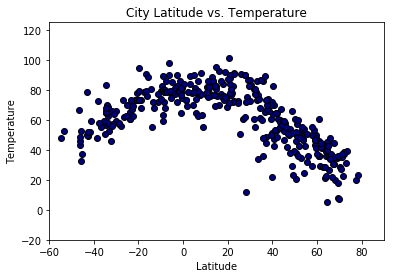

In [16]:
#converting string to numeric 
columns = ['Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind_Speed']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature")
plt.ylim(-20,125)

plt.savefig("LatitudeVsTemperature.png")
plt.show()


#### Latitude vs. Humidity Plot

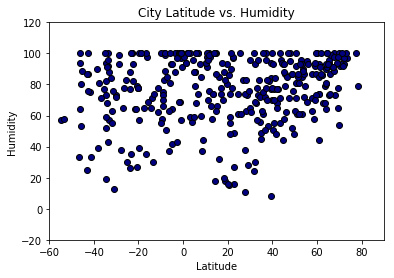

In [17]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity")
plt.ylim(-20,120)

plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

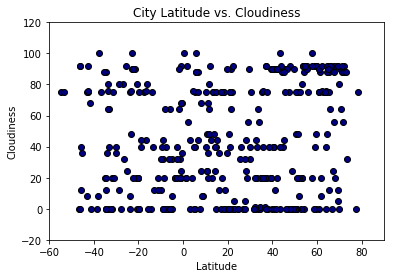

In [18]:

# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness")
plt.ylim(-20,120)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

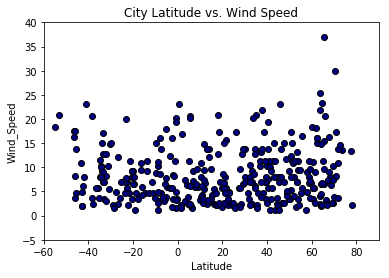

In [20]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind_Speed']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind_Speed")
plt.ylim(-5,40)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()